In [1]:
import ROOT
from ROOT import gPad, gStyle
import uproot

Welcome to JupyROOT 6.24/06


In [2]:
MEM = []

In [3]:
gStyle.SetOptStat(0)

In [13]:
path = '/pad/seyang/Projects/GEM-Workspace/SW-Dev/220112_GEM-Efficiency-By-GEMCSCSegment/test/CMSSW_12_3_0_pre5/EightMu_Pt-0-200_Eta-GE11+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

In [14]:
root_file = ROOT.TFile(path)

In [15]:
gem_dir = root_file.Get('DQMData/Run 1/GEM/Run summary')
gem_dir.ls()

TDirectoryFile*		Run summary	Run summary
 KEY: TDirectoryFile	Efficiency;1	Efficiency
 KEY: TDirectoryFile	EventInfo;1	EventInfo


In [16]:
eff_dir = gem_dir.Get('Efficiency')
eff_dir.ls()

TDirectoryFile*		Efficiency	Efficiency
 KEY: TDirectoryFile	GEMCSCSegment;1	GEMCSCSegment
 KEY: TDirectoryFile	GLBMuon;1	GLBMuon


In [17]:
glb_dir = eff_dir.Get('GLBMuon')

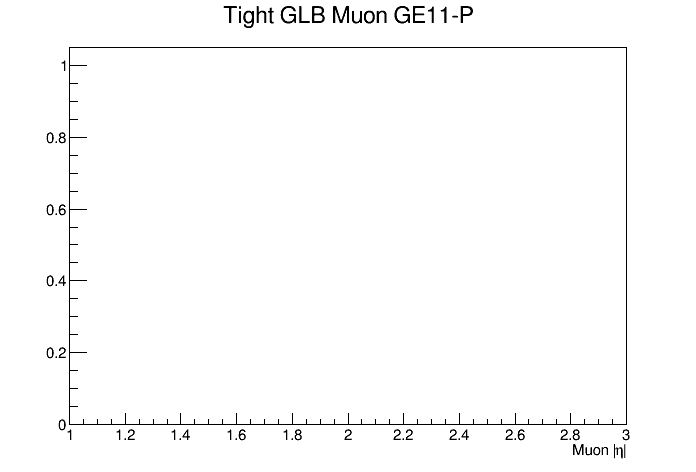

In [18]:
glb_dir.Get('Efficiency/muon_eta_GE11-P').Draw('HIST')
gPad.Draw()

In [12]:
gem_list = [
    'GE11-M-L2',
    'GE11-M-L1',
    'GE11-P-L1',
    'GE11-P-L2',
]

color_list = [
    38,
    ROOT.kBlue,
    ROOT.kRed,
    46
]

In [10]:
ROOT.gStyle.SetOptStat(0)

In [80]:
key = 'start_det'
def draw(input_dir, key, logy=False, suffix=''):
    h_pos = input_dir.Get(f'{key}_GE11-P' + suffix)
    h_neg = input_dir.Get(f'{key}_GE11-M' + suffix)
    h_pos.SetLineColor(ROOT.kRed)
    h_neg.SetLineColor(ROOT.kBlue)

    maximum = max(h_pos.GetMaximum(), h_neg.GetMaximum())
    if logy:
        minimum = 1
        maximum *= 2
    else:
        minimum = 0
        maximum *= 1.02
    h_pos.GetYaxis().SetRangeUser(minimum, maximum)

    h_pos.Draw('HIST E1')
    h_neg.Draw('HIST E1 SAME')
    
    legend = ROOT.TLegend()
    legend.AddEntry(h_pos, 'GE11-P', 'l')
    legend.AddEntry(h_neg, 'GE11-M', 'l')
    legend.Draw('SAME')

    gPad.SetLogy(logy)
    gPad.Draw()
    
    global MEM
    MEM += [legend]

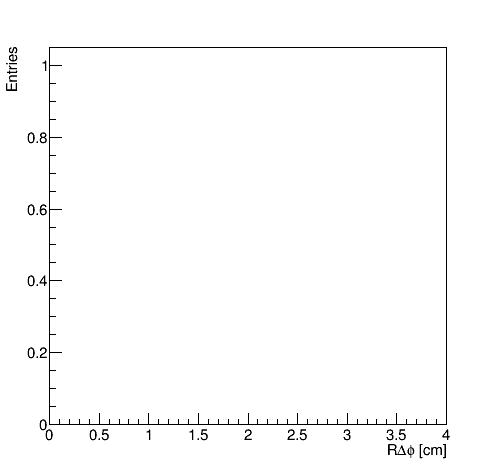

In [78]:
h = glb_dir.Get('Misc/all_abs_rdphi')
h.Draw('HIST')
gPad.Draw()

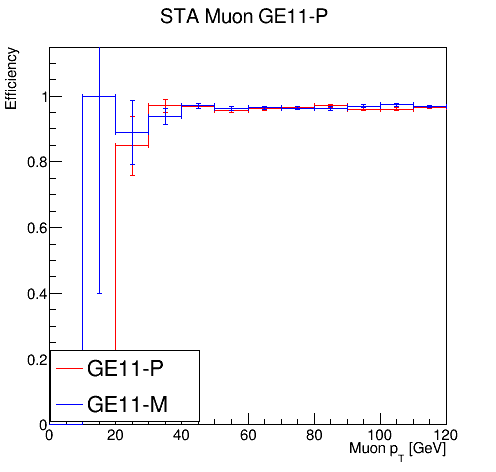

In [81]:
draw(sta_dir, 'Efficiency/eff_muon_pt')

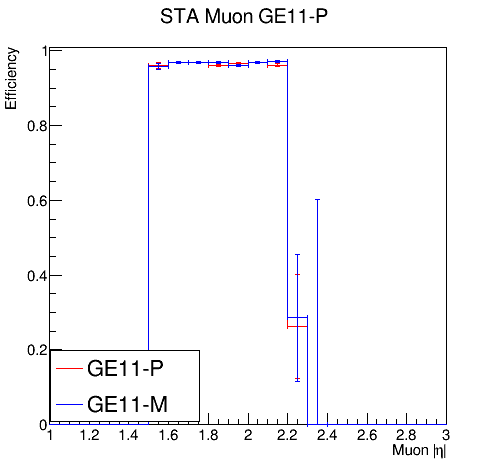

In [82]:
draw(sta_dir, 'Efficiency/eff_muon_eta')

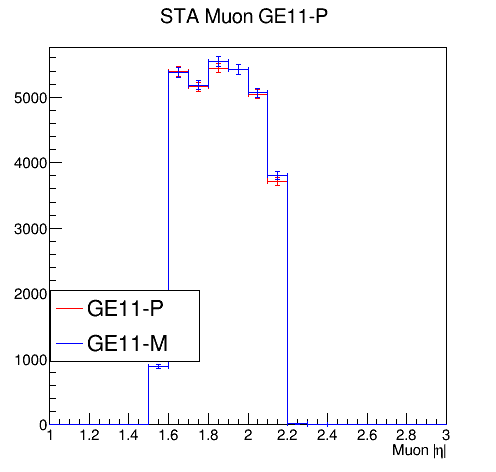

In [83]:
draw(sta_dir, 'Efficiency/muon_eta')

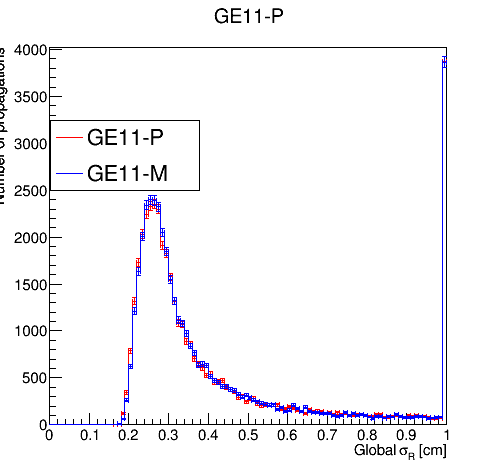

In [84]:
draw(sta_dir, 'Misc/prop_err_r')

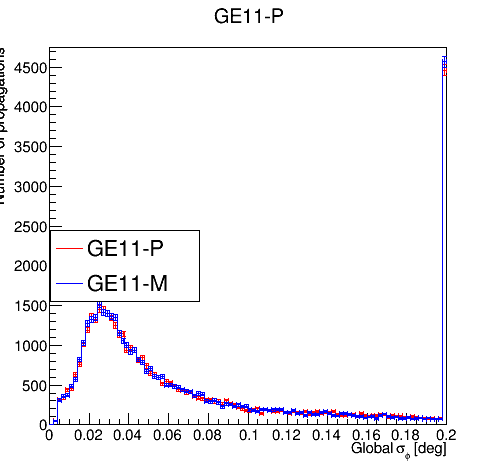

In [85]:
draw(sta_dir, 'Misc/prop_err_phi')

In [86]:
def draw_eff(input_dir, key):
    c = ROOT.TCanvas('c', '', 500, 500)
    c.cd()
    h_den = input_dir.Get(key)
    h_num = input_dir.Get(key + '_matched')
    eff = ROOT.TEfficiency(h_num, h_den)
    eff.Draw()
    gPad.Draw()
    
    x_axis = eff.GetPaintedGraph().GetXaxis()
    nbinx = x_axis.GetNbins()
    x_min = x_axis.GetBinLowEdge(1)
    x_max = x_axis.GetBinUpEdge(nbinx) + x_axis.GetBinWidth(nbinx)
    
    y_axis = eff.GetPaintedGraph().GetYaxis()
    y_axis.SetRangeUser(0.8, 1)

    line = ROOT.TLine(x_min, 0.95, x_max, 0.95)
    line.SetLineColor(ROOT.kGreen)
    line.SetLineStyle(ROOT.kDashed)
    line.SetLineWidth(2)
    line.Draw('SAME')
    gPad.Update()
    return c, eff, line

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101


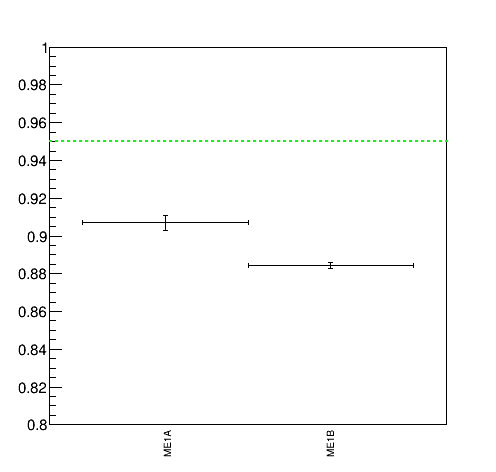

In [87]:
eff = draw_eff(sta_dir, 'Misc/start_det_GE11-P')

(<cppyy.gbl.TCanvas object at 0x7189830>,
 <cppyy.gbl.TLine object at 0x70a2320>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


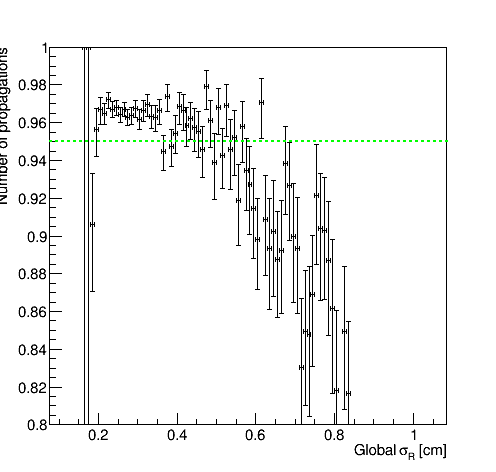

In [88]:
draw_eff(sta_dir, 'Misc/prop_err_r_GE11-P')

(<cppyy.gbl.TCanvas object at 0x6582d90>,
 <cppyy.gbl.TLine object at 0x70a22a0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


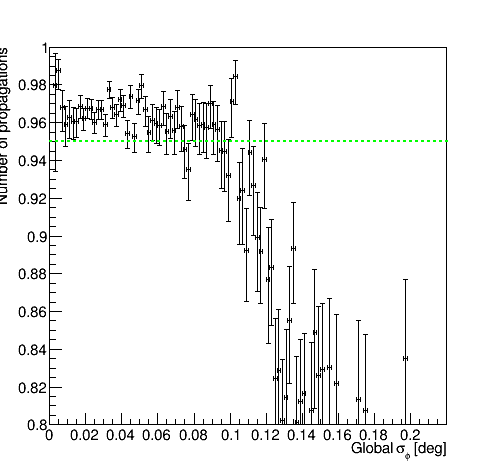

In [89]:
draw_eff(sta_dir, 'Misc/prop_err_phi_GE11-P')

(<cppyy.gbl.TCanvas object at 0x72553d0>,
 <cppyy.gbl.TLine object at 0x7258d80>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


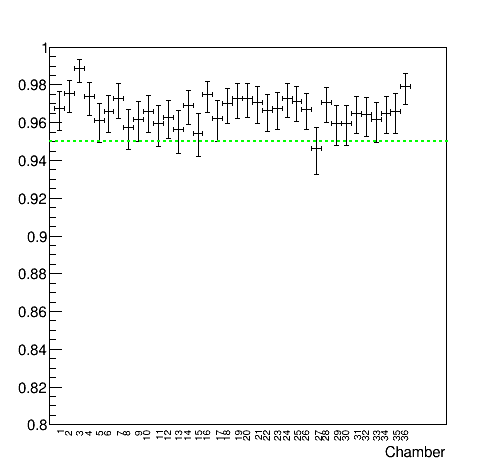

In [90]:
draw_eff(sta_dir, 'Efficiency/chamber_GE11-P-L1')

(<cppyy.gbl.TCanvas object at 0x6dce9e0>,
 <cppyy.gbl.TLine object at 0x7284fb0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


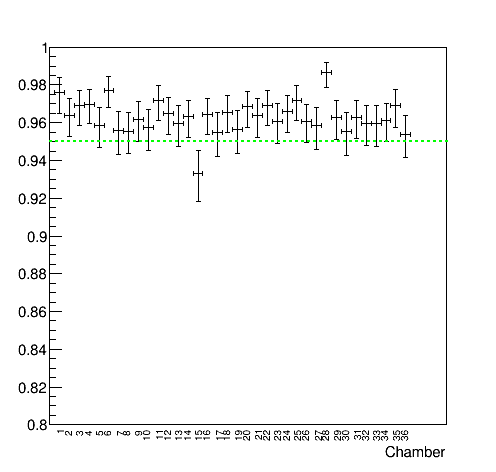

In [91]:
draw_eff(sta_dir, 'Efficiency/chamber_GE11-P-L2')

(<cppyy.gbl.TCanvas object at 0x6581500>,
 <cppyy.gbl.TLine object at 0x7173100>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


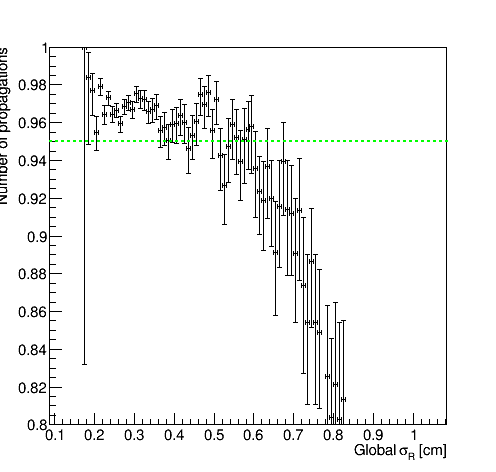

In [92]:
draw_eff(sta_dir, 'Misc/prop_err_r_GE11-M')

In [94]:
gemcsc_dir.Get('Efficiency').ls()

TDirectoryFile*		Efficiency	Efficiency
 KEY: TH1F	chamber_GE11-M-L1;1	 GE11-M-L1
 KEY: TH1F	chamber_GE11-M-L1_matched;1	 GE11-M-L1
 KEY: TH1F	chamber_GE11-M-L2;1	 GE11-M-L2
 KEY: TH1F	chamber_GE11-M-L2_matched;1	 GE11-M-L2
 KEY: TH1F	chamber_GE11-P-L1;1	 GE11-P-L1
 KEY: TH1F	chamber_GE11-P-L1_matched;1	 GE11-P-L1
 KEY: TH1F	chamber_GE11-P-L2;1	 GE11-P-L2
 KEY: TH1F	chamber_GE11-P-L2_matched;1	 GE11-P-L2
 KEY: TProfile	eff_chamber_GE11-M-L1;1	 GE11-M-L1
 KEY: TProfile	eff_chamber_GE11-M-L2;1	 GE11-M-L2
 KEY: TProfile	eff_chamber_GE11-P-L1;1	 GE11-P-L1
 KEY: TProfile	eff_chamber_GE11-P-L2;1	 GE11-P-L2


(<cppyy.gbl.TCanvas object at 0x7394320>,
 <cppyy.gbl.TLine object at 0x711f110>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


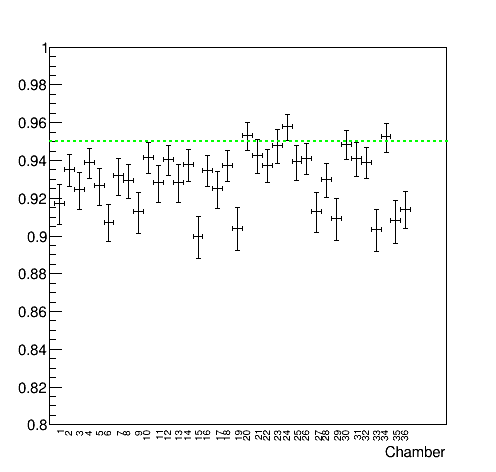

In [96]:
draw_eff(gemcsc_dir, 'Efficiency/chamber_GE11-P-L1')

(<cppyy.gbl.TCanvas object at 0x73ab350>,
 <cppyy.gbl.TLine object at 0x73b7690>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


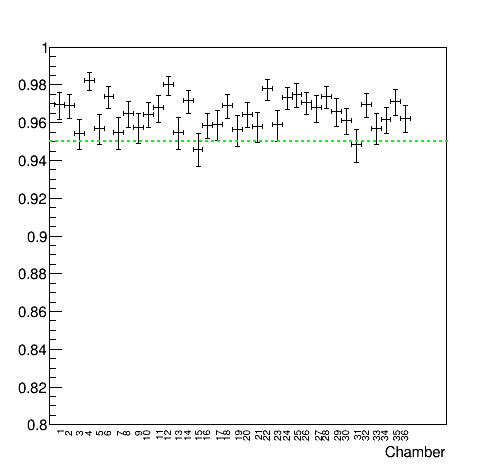

In [97]:
draw_eff(gemcsc_dir, 'Efficiency/chamber_GE11-P-L2')

In [19]:
path = '/store/user/seyang/GEM/220112_GEM-Efficiency-By-GEMCSCSegment/CMSSW_12_3_0_pre5/EightMu_Pt-0-200_Eta-GE11+2021/step4_DQM/step3_99.root'

In [20]:
root_file = ROOT.TFile(path)

In [21]:
root_file.ls()

TFile**		/store/user/seyang/GEM/220112_GEM-Efficiency-By-GEMCSCSegment/CMSSW_12_3_0_pre5/EightMu_Pt-0-200_Eta-GE11+2021/step4_DQM/step3_99.root	1
 TFile*		/store/user/seyang/GEM/220112_GEM-Efficiency-By-GEMCSCSegment/CMSSW_12_3_0_pre5/EightMu_Pt-0-200_Eta-GE11+2021/step4_DQM/step3_99.root	1
  KEY: TDirectoryFile	MetaData;1	MetaData
  KEY: TTree	Indices;1	Indices
  KEY: TTree	Ints;1	Ints
  KEY: TTree	Floats;1	Floats
  KEY: TTree	Strings;1	Strings
  KEY: TTree	TH1Fs;1	TH1Fs
  KEY: TTree	TH1Ss;1	TH1Ss
  KEY: TTree	TH1Ds;1	TH1Ds
  KEY: TTree	TH2Fs;1	TH2Fs
  KEY: TTree	TH2Ss;1	TH2Ss
  KEY: TTree	TH2Ds;1	TH2Ds
  KEY: TTree	TH3Fs;1	TH3Fs
  KEY: TTree	TProfiles;1	TProfiles
  KEY: TTree	TProfile2Ds;1	TProfile2Ds


In [23]:
for key in root_file.Get('TH1Ds').GetListOfBranches():
    print(key)

Name: FullName Title: FullName
Name: Flags Title: Flags/i
Name: Value Title: Value


In [26]:
for entry in root_file.Get('TH1Fs'):
    print(entry.FullName)

DQM/TimerService/event allocated
DQM/TimerService/event deallocated
DQM/TimerService/event time_real
DQM/TimerService/event time_thread
DQM/TimerService/explicit allocated
DQM/TimerService/explicit deallocated
DQM/TimerService/explicit time_real
DQM/TimerService/explicit time_thread
DQM/TimerService/overhead allocated
DQM/TimerService/overhead deallocated
DQM/TimerService/overhead time_real
DQM/TimerService/overhead time_thread
DQM/TimerService/process DQM allocated
DQM/TimerService/process DQM deallocated
DQM/TimerService/process DQM time_real
DQM/TimerService/process DQM time_thread
DQM/TimerService/source allocated
DQM/TimerService/source deallocated
DQM/TimerService/source time_real
DQM/TimerService/source time_thread
GEM/Efficiency/GEMCSCSegment/Efficiency/chamber_GE11-M-L1
GEM/Efficiency/GEMCSCSegment/Efficiency/chamber_GE11-M-L1_matched
GEM/Efficiency/GEMCSCSegment/Efficiency/chamber_GE11-M-L2
GEM/Efficiency/GEMCSCSegment/Efficiency/chamber_GE11-M-L2_matched
GEM/Efficiency/GEMCS